In [3]:
%load_ext autoreload
%autoreload 2

## **Explanable CV `BostonGene` test case**

Chernyy Vladimir

Итак, для начала нам потребуется обучить классификатор для картинок

Обозначим шаги достижения нашей цели:

1. Подготовка данных
    1. Разбиваем на трейн/валидацию в соотношении 80:20(откажемся от теста в пользу увеличения обучающей выборки). Я использовал `train_test_split` из `sklearn` потому что торчевский `random_split` не позволяет разбивать по *stratified*-стратегии, то есть с поддержанием оригинального распределения классов.
    2. Смотрим на распределения классов
        1. В случае, если оно неравномерное, в `torch.DataLoader` будем передавать `WeightedRandomSampler` из `torch.utils.data`(будет семплить классы с такой частотой, чтобы все классы попадались с равным шансом)
    3. Добавляем аугментации для покрытия еще большего мно-ва возможных искажений картинок посредством поворота, шума, рандомного кропа -- ничто из этого не влияет на семантику нашей задачи -- принадлежность к стилю. А также нормализацию со статистиками `ImageNet` и билинейную интерполяцию к требуемым размерностям каритинок(я выбрал `128x128`).

In [73]:
from torchvision.datasets import ImageFolder

data = ImageFolder('./images')

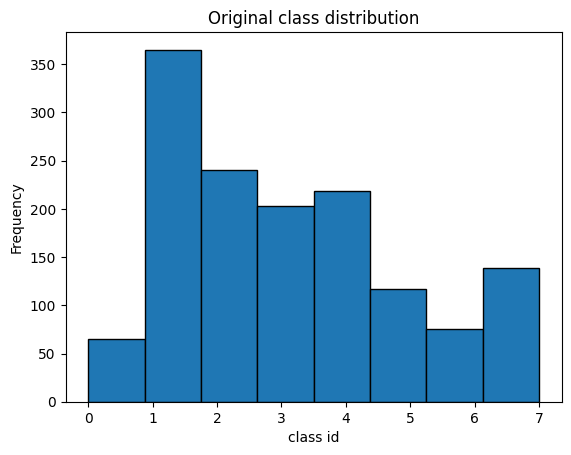

In [74]:
import matplotlib.pyplot as plt

plt.hist(data.targets, bins=len(data.classes), edgecolor='k')

plt.xlabel('class id')
plt.ylabel('Frequency')

plt.title('Original class distribution')

plt.show()

Очевидно, мы встретили сценарий, описанный в `2.1`

Посмотрим теперь, насколько удачно мы реализовали семплер

In [116]:
from data import BGDataModule

data = BGDataModule(
    data_dir='./images'
)

data.setup('fit')

In [117]:
train_dataloader = data.train_dataloader()

In [123]:
buffer = []
for _, cls in train_dataloader:
    buffer += cls.tolist()

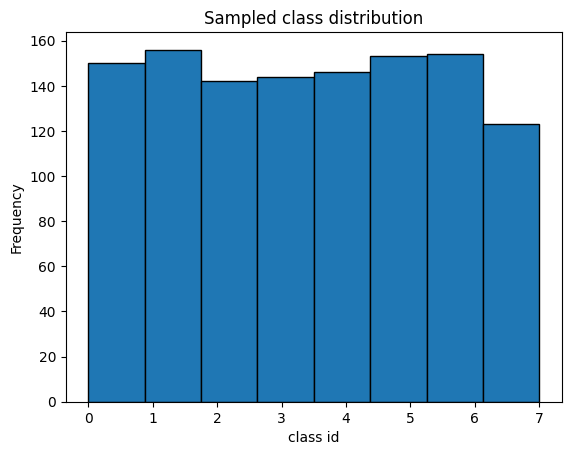

In [124]:
import matplotlib.pyplot as plt

plt.hist(buffer, bins=len(data.dataset.classes), edgecolor='k')

plt.xlabel('class id')
plt.ylabel('Frequency')

plt.title('Sampled class distribution')

plt.show()

Теперь все выглядит ровно